In [38]:
import os
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

directory_path = "C:\\Users\\jy\\Downloads\\EMDS7\\EMDS7xml"
xml_files = [f for f in os.listdir(directory_path) if f.endswith('.xml')]

object_names = []
bbox_widths = []
bbox_heights = []

for xml_file in xml_files:
    file_path = os.path.join(directory_path, xml_file)
    tree = ET.parse(file_path)
    root = tree.getroot()
    
    for obj in root.findall('object'):
        name = obj.find('name').text
        xmin = int(obj.find('bndbox/xmin').text)
        ymin = int(obj.find('bndbox/ymin').text)
        xmax = int(obj.find('bndbox/xmax').text)
        ymax = int(obj.find('bndbox/ymax').text)
        
        width = xmax - xmin
        height = ymax - ymin
        
        object_names.append(name)
        bbox_widths.append(width)
        bbox_heights.append(height)

# Convert to DataFrame
df = pd.DataFrame({
    'object_name': object_names,
    'bbox_width': bbox_widths,
    'bbox_height': bbox_heights
})


In [39]:
df.head()

,object_name,bbox_width,bbox_height
0,G001,809,684
1,unknown,298,343
2,G001,566,1354
3,unknown,60,79
4,unknown,106,178


In [40]:
df.describe()

,bbox_width,bbox_height
count,13216.000000,13216.000000
mean,200.656401,191.400802
std,227.226318,215.084582
min,12.000000,13.000000
25%,69.000000,67.000000
50%,123.000000,117.000000
75%,240.000000,227.000000
max,2047.000000,1535.000000


In [41]:
df.nunique()

object_name     42
bbox_width     991
bbox_height    917
dtype: int64

In [42]:
df['object_name'].value_counts()

unknown    8088
G022       1216
G003        826
G019        279
G028        206
G016        181
G001        178
G025        165
G009        155
G012        144
G018        139
G032        134
G004        108
G014        105
G039         99
G017         90
G008         88
G011         84
G036         81
G035         79
G015         73
G038         69
G010         66
G023         59
G005         53
G030         51
G002         45
G020         38
G031         38
G040         37
G024         37
G033         30
G006         28
G029         24
G041         19
G027         19
G034         19
G026         16
G007         15
G013         13
G037         13
G021          9
Name: object_name, dtype: int64

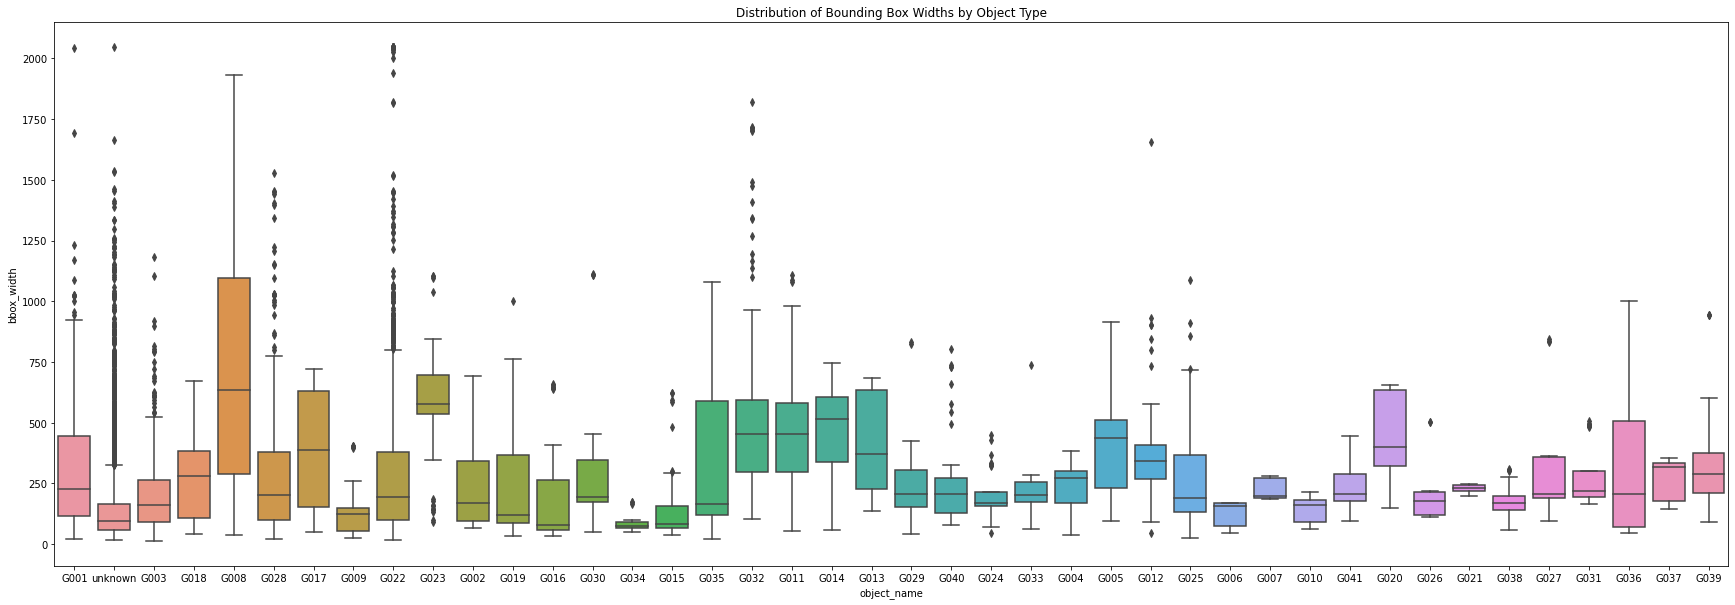

In [43]:
# Visual Analysis
plt.figure(figsize=(30, 10))
sns.boxplot(data=df, x='object_name', y='bbox_width')
plt.title('Distribution of Bounding Box Widths by Object Type')
plt.show()

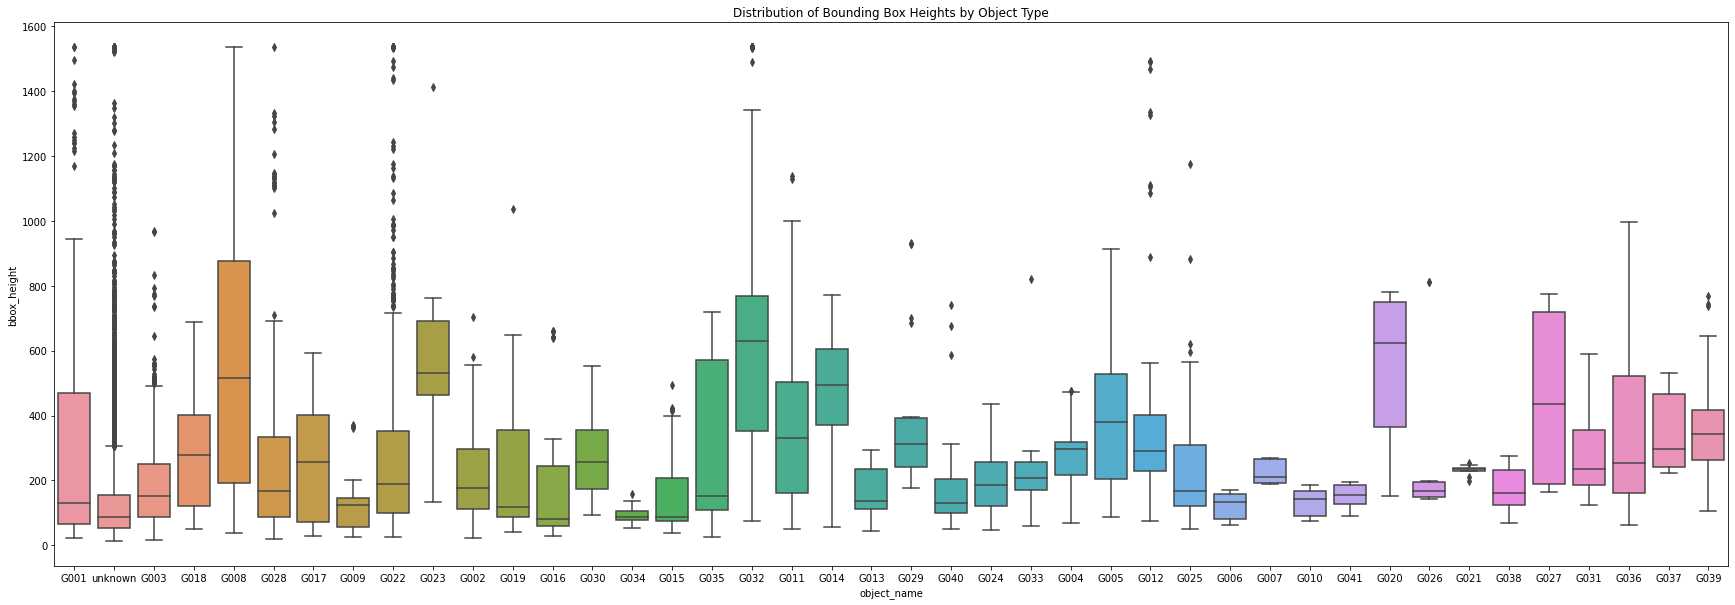

In [45]:
plt.figure(figsize=(30, 10))
sns.boxplot(data=df, x='object_name', y='bbox_height')
plt.title('Distribution of Bounding Box Heights by Object Type')
plt.show()

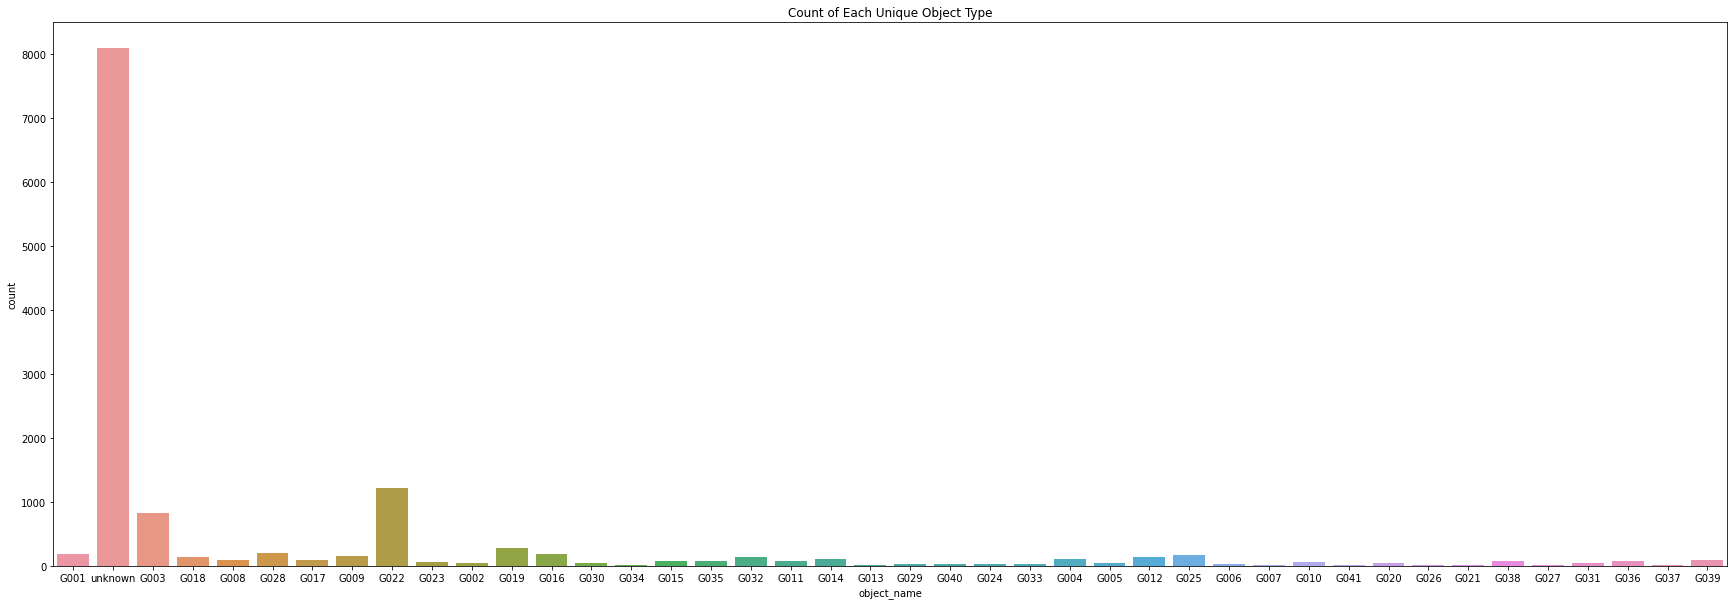

In [47]:
plt.figure(figsize=(30, 10))
sns.countplot(data=df, x='object_name')
plt.title('Count of Each Unique Object Type')
plt.show()

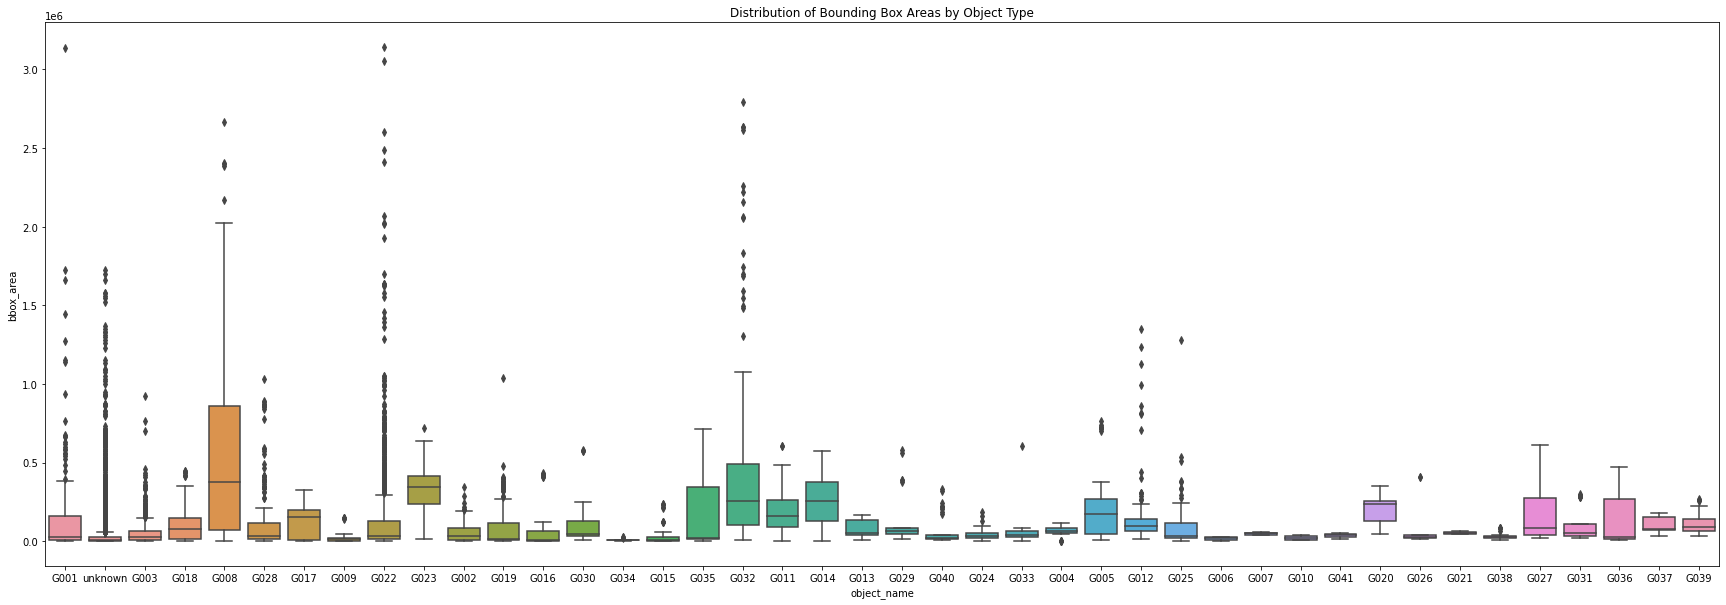

In [49]:
df['bbox_area'] = df['bbox_width'] * df['bbox_height']
plt.figure(figsize=(30, 10))
sns.boxplot(data=df, x='object_name', y='bbox_area')
plt.title('Distribution of Bounding Box Areas by Object Type')
plt.show()

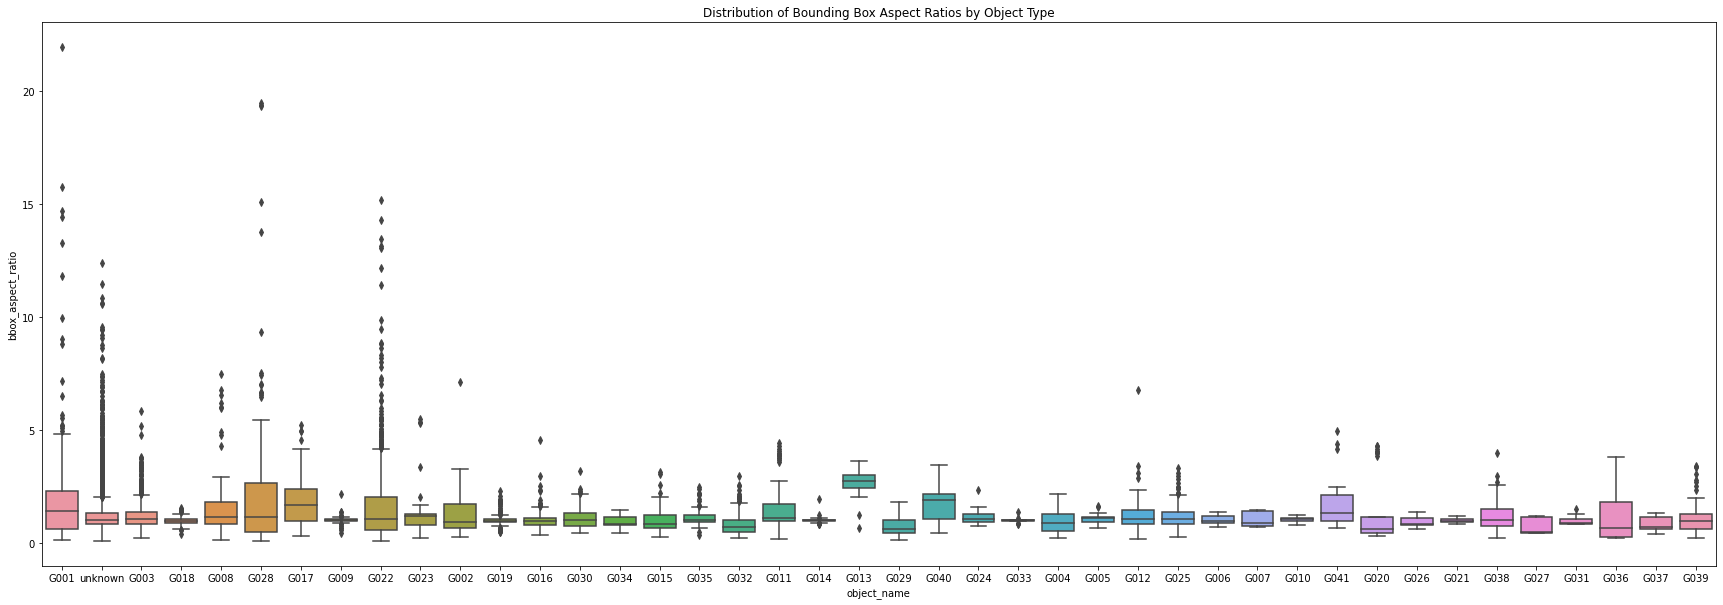

In [50]:
df['bbox_aspect_ratio'] = df['bbox_width'] / df['bbox_height']
plt.figure(figsize=(30, 10))
sns.boxplot(data=df, x='object_name', y='bbox_aspect_ratio')
plt.title('Distribution of Bounding Box Aspect Ratios by Object Type')
plt.show()


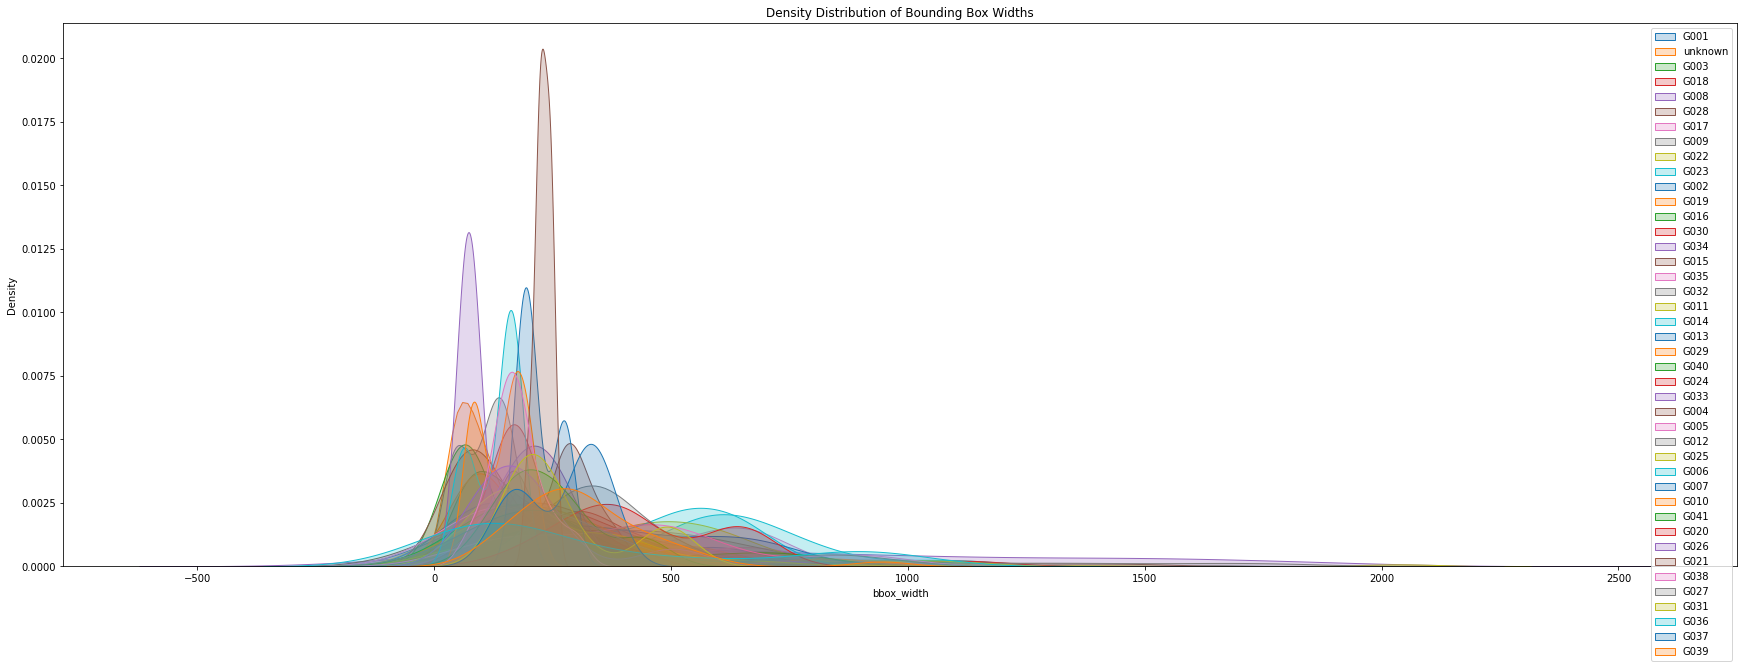

In [51]:
plt.figure(figsize=(30, 10))
for obj_name in df['object_name'].unique():
    subset = df[df['object_name'] == obj_name]
    sns.kdeplot(subset['bbox_width'], label=obj_name, shade=True)
plt.title('Density Distribution of Bounding Box Widths')
plt.legend()
plt.show()